In [4]:
#import librarries
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline


# normal equation
def normal_equation(y, X):
    return np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

# generate random data
def generate_random_data(size = 100):
    X = 2 * np.random.rand(m, 1)
    y = 4 + 3 * X + np.random.rand(m, 1)
    return X, y


No handles with labels found to put in legend.


(100, 1) (100, 1) (1,)


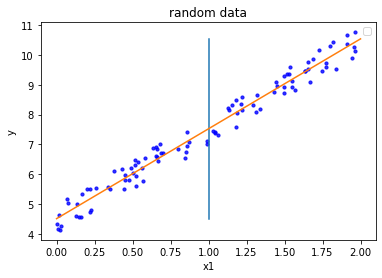

In [5]:
# generate a one direction random data (easy of visualisation)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1)
theta = np.random.rand(1)

print(X.shape, y.shape, theta.shape)

yhat = X.dot(theta.T)

t_n = normal_equation(y, np.c_[np.ones((100,1)), X]) #add x0 = 1 for the intercept
X_new = np.c_[np.ones((2,1)), np.array([[0],[2]])]
y_new = X_new.dot(t_n)

fig, ax = plt.subplots(1, 1)
ax.scatter(X, y, c = 'b', s = 10, alpha = 0.8)
ax.plot(X_new, y_new)
ax.set_title("random data")
plt.xlabel('x1')
plt.ylabel('y')
ax.legend()


In [6]:
# MSE cost function (root mean square error)
# typically used as error function for regression models
# the goal is to minimize the error function by finding tbe best
# thetas
def MSE(X, Theta, y):
    y_hat = X.dot(Theta)
    MSE = np.sum(np.square(y_hat - y))
    return MSE

# vectorised version of partial differential equation 
def d_MSE(X_b, theta, y):    
    return 2 / len(X) * X_b.T.dot(X_b.dot(theta) - y)

#MSE(y, X, theta)
#d_MSE(y, X, theta)

## Sklearn linear regression

The computational complexity is typically (X^2.3) for normal equation, which is why we normally use GD to minimise cost function.

In [7]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.50691602]), array([[3.01960396]]))

In [8]:
np.c_[lin_reg.intercept_, lin_reg.coef_].T

array([[4.50691602],
       [3.01960396]])

In [9]:
t_n

array([[4.50691602],
       [3.01960396]])

## Gradient Descent

### Batch Gradient Descent
Compute gradients for the whole batch', adjusting theta by minus it against the partial derivative of it with a leanring rate multiplier. The higher the rate the fast, but may result in overshooting. The lower the rate the slower, but may stuck.


### Stochastic Gradient Descent
Picks a random instance of the training set at every step and compute gradients at the step. This is fast due to size for each step, and makes it possible for training large datasets.  However, less regular due to the random nature and cost may go up and down. 

In [10]:
# Provide a learning rate, goes for number of iterations with an randomised
# theta. The hope is to find local minimal.
def gradient_descent(learn_rate, n_iter, X, theta, y):    
    theta0 = []
    theta1 = []
    cist = []
    for i in range(n_iter):                   
        gradients = d_MSE(X, theta, y)
        theta = theta - learn_rate * gradients
        cost = MSE(X, theta, y)
        if i % 10 == 0:
            print(f"{i}, {cost}")
    print(f"{i} iterations used")
    return theta


def learning_schedule(t, t0 = 5, t1 = 50):
    return t0 / (t + t1)


# stochastic Gradient Descent
# initial hyper parameter to adjust to ensure no zero division and reduce learning rate when epoch is higher
def SGD(n_epochs, X, theta, y, t0 = 5, t1 = 50):   
    
    m = len(X)
    for epoch in range(n_epochs):
        for i in range(m):        
            random_index = np.random.randint(m)
            xi = X[random_index:random_index + 1]
            yi = y[random_index:random_index + 1]
            
            gradients = d_MSE(xi, theta, yi)
            
            learning_rate = learning_schedule(epoch + i)
            theta = theta - learning_rate * gradients                        
        #if epoch % 100 == 0:
        #    print(f"{i}, {MSE(X, theta, y)}, {learning_rate}")                
    return theta

# mini batch gradient descent
# same as stocastic, but mini random batches of a time
def mini_batch_SGD(n_epochs, X, theta, y, batch_size = 1, t0 = 5, t1 = 50):   
    m = len(X)
    for epoch in range(n_epochs):
        for i in range(m):        
            random_index = np.random.randint(m)
            xi = X[random_index:random_index + batch_size]
            yi = y[random_index:random_index + batch_size]
            
            gradients = d_MSE(xi, theta, yi)
            
            learning_rate = t0 / (epoch * m + i + t1)
            theta = theta - learning_rate * gradients                                          
    return theta

X_b = np.c_[np.ones((100, 1)), X]
theta = np.random.rand(2, 1)
#gradient_descent(0.1, 100, X_b, theta, y)
print(SGD(10000, X_b, theta, y))
print(mini_batch_SGD(100, X_b, theta, y, 100))

[[4.5060612 ]
 [3.02030597]]
[[4.52539369]
 [3.01971705]]


## Polynomial Regresion

Complex non-linear data can be fit with polynominal equestions. This is called Polynomial Regression.

In [11]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.rand(m, 1) 



In [12]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 2, include_bias = False)
X_poly = poly_features.fit_transform(X)

print(f"Original: {X[0]}")
print(f"Original and it's Squared: {X_poly[0]}")

Original: [-1.07476653]
Original and it's Squared: [-1.07476653  1.15512309]


y = 0.5096743414786139*x1^2 0.9810435111109812*x2 + 2.496007539039029


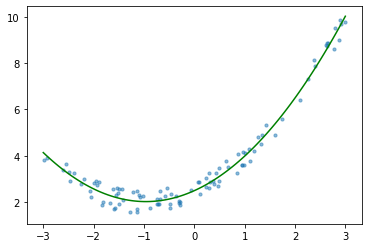

In [13]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

coefficents = lin_reg.coef_.ravel()
intercept = lin_reg.intercept_[0]

print(f"y = {coefficents[1]}*x1^2 {coefficents[0]}*x2 + {intercept}")



X_new = np.linspace(-3, 3, 100)
y_new = coefficents[1] * np.square(X_new) + coefficents[0] * X_new + intercept

plt.plot(X_new, y_new, c = 'g')
plt.scatter(X, y, s = 10, alpha = 0.5)

In [14]:
lin_reg.intercept_[0]

2.496007539039029

## Learning Rate

Plot Training / Validation *MRSE* vs training set size 

In [15]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth = 2, label = 'train')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth = 2, label = 'val')
    #return train_errors, val_errors
    

When training instances are 1 or 2 points, error will be 0, but generalise very poorly therefore high error, as training increases, the error in training will go up until it plateaus.The validation set may go done. However, due to the polynomial nature of the data, the error remains high. This indicate model is underfitting

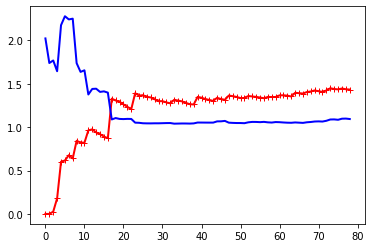

In [16]:
lin_reg = LinearRegression()
#X, y = generate_random_data()
plot_learning_curves(lin_reg, X, y)

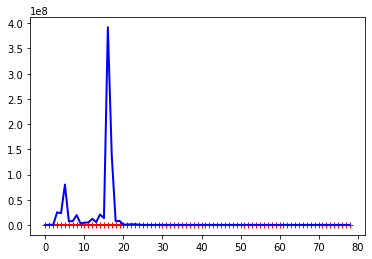

In [17]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
                            ('poly_features', PolynomialFeatures(degree = 20, include_bias=False)),
                            ('lin_reg', LinearRegression())
                        ])

plot_learning_curves(polynomial_regression, X, y)

## Bias / Variance / Irreducible Error

### Bias
This part of the generalisation error is due to wrong assumptions, such as assuming that data is linear when it is actually quandratic. A high-bias model is most like to underfit the training data.

### Variance
This part is due to the model's excessive sensitivity to small variations in the training data. A model with many degrees of freedom (such as a high-degree polynomial model) is likely to have high variance, and thus to overfit the training data. 

### Irreducible Error
This part is due to the noisiness of the data itself. The only way to reduce this part of the error is to clean up data.

Bias and Variance is always a trade off between model complexity (more complex less bias more variance.)

## Regularisation

### Ridge Regression
Ridge Regrssion (Tikhnov regularisation) is a regularised version of linear regression. Forces model not only fit but keep the weights as small as possible.

Sum of all weight^2 with a hyper parameter (alpha which controlls how much regularisation is applied. if 0 then typical linear regression).

#### Cost function
j(theta) = MSE(theta) + alpha * 1/2 * sum(theta^2)

sum(theta^2) = l2 norm


### Lasso Regrssion
Least absolute shrinkage and selection operator regression, using l1 norm instead of l2 norm

#### Cost function
j(theta) = MSE(theta) + alpha * sum(abs(theta))


### Elastic Net
j(theta) = MSE(theta) + r*alpha* sum(abs(theta)) + (1-r)/2 * alpha * sum(theta^2)

Note that ridge regression is a useful technique if as it automatically reduce features, however if there are features of importance it would be better to use Lasso or Elastic Net

## Early Stopping

Basically check when validation error is minimal and not decreasing anymore.

In [45]:
from sklearn.base import clone
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)

poly_scaler = Pipeline([
    ("PolynomialFeatures", PolynomialFeatures(degree = 2, include_bias = True)),
    ("StandardScaler", StandardScaler())
])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.fit_transform(X_val)


sgd_reg = SGDRegressor(n_iter_no_change = 1, warm_start = True, penalty = None, learning_rate = "constant", eta0 = 0.0005)

min_val_error = float("inf")

best_epoch = None
best_model = None

for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train.ravel())
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val_predict, y_val)
    if val_error < min_val_error:
        min_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)



In [46]:
print(best_epoch)
print(sgd_reg.coef_, sgd_reg.intercept_)

802
[0.         1.54304565 1.35021219] [3.59649334]


In [50]:
X_train[0]


array([-0.68582861])

In [49]:
X_train_poly_scaled[0]

array([ 0.        , -0.29084314, -0.78422066])